<a href="https://colab.research.google.com/github/slader1144/Photon/blob/main/Trabajo1Modelamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Nivel de agua')

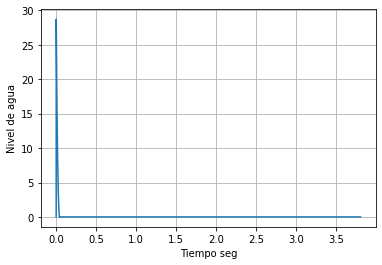

In [19]:
import numpy as np
import matplotlib.pyplot as plt
#Parametros de la simulación
Mo=1.5 #peso de la botella con 1lt de agua
mo=0.5 #Peso de la botella vacía, 500gr
Kv=0.1 #Constante de fricción
g=9.8 #Aceleración de la gravedad
C=20 #Velocidad de salida del agua
u=-1/.5 #El kg de agua se vacía en 0.5 segundo
dt=0.001 #Cambio en el tiempo
#Variables de la simulación
yo=0 #Altura inicial del cohete
y1=0 #Velocidad inicial del cohete
t=0
h= 0.3 #Altura de la botella en m
ht= 0.15 #Altura inicial del agua dependiendo del tiempo
rho= 1000
At=0.005 #Área del tanque
Ao=0.00062 #Área del orificio de la botella
Psi=92 #Psi con 1.2 atmosferas
Pa=101325 # Presión atmosférica
dhdt=0
Fp=0
#Vectores para almacenar los valores del movimiento
vYo=[yo]
vY1=[y1]
vT=[t]
vFp=[Fp]
vDhdt=[dhdt]
while(yo>=0): #Vamos a correr la simulación hasta que caiga nuevamente
 #Cálculo de las velocidades
 dhdt =np.sqrt((Pa-(rho*g*ht)-(Psi/((h-ht)*At)))/(1/2*rho*(1-(At/Ao)**2)))
 dyodt=y1
 if(ht>0):
  Fp=rho*(At**2)/Ao*(dhdt**2)
 else:
  Fp=0
 if(Mo+u*t>mo): #Aún hay combustible:
  dy1dt=(-Kv*y1/(Mo+u*t)-C*u/(Mo+u*t)-g)
 else:
  dy1dt=-Kv*y1/mo-g
 #Cálculo de las nuevas posiciones
 yo=yo+dt*dyodt
 y1=y1+dt*dy1dt
 t=t+dt
 h=h+dt*dhdt
 ht=ht-dt*dhdt
 vYo.append(yo)
 vY1.append(y1)
 vT.append(t)
 vDhdt.append(dhdt)
 vFp.append(Fp)

#plt.plot(vT, vYo)
#plt.grid()
#plt.xlabel('Tiempo seg')
#plt.ylabel('Altura del cohete en metros')

#plt.plot(vT,vDhdt)
#plt.grid()
#plt.xlabel('Tiempo seg')
#plt.ylabel('Velocidad del cohete')

plt.plot(vT,vFp)
plt.grid()
plt.xlabel('Tiempo seg')
plt.ylabel('Nivel de agua')